<a href="https://colab.research.google.com/github/fernandocillo/EE301/blob/main/experimento3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento 3: Efeito Hall

Roberto Dilelio Noble - 224138 \\
Fernando Teodoro de Cillo - 197029 \\
Pedro Henrique de Oliveira Alves - 185684


In [ ]:
# Bibliotecas auxiliares
import numpy as np
from matplotlib import pyplot as plt

#===============================================================
# Funcao Retorna Coeficiente Angular (a) e Coeficiente linear (b)
#===============================================================
def MMQ(x, y):
    nx = len(x)
    ny = len(y)

    if nx == ny:
        x2 = np.multiply(x,x)
        xy = np.multiply(x,y)

        sum_x  = sum(x)
        sum_y  = sum(y)
        sum_x2 = sum(x2)
        sum_xy = sum(xy)

        A = [[nx, sum_x],[sum_x, sum_x2]]
        S = [sum_y, sum_xy]

        [b, a] = np.linalg.solve(A,S)
        
        return ([a, b])
    else:
        print("Erro: Vetores de diferentes tamanhos")
#===============================================================

**Cuidado:** os condutores que conectam as trilhas ao cristal  são extremamente frágeis e podem se quebrar se forem tocados.

## Modelo

O modelo utilizado para o comportamento dos portadores na montagem experimental é ilustrado na seguinte figura.
 Devido à atuação do campo magnético sobre as cargas em movimento, surgirá uma força  $\vec F_B = -q\vec v_d\times\vec B$, que provocará um desequilíbrio de cargas na direção transversa à corrente. Esse desequilíbrio, por sua vez, resulta numa componente de força elétrica
 $\vec F_E = -q\vec E$.

<p><img class="align-center" alt="Modelo para caracterizaÃ§Ã£o do efeito Hall" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAi4AAADlCAYAAAB0+nyBAAAACXBIWXMAABJ0AAASdAHeZh94AAAAGXRFWHRTb2Z0d2FyZQB3d3cuaW5rc2NhcGUub3Jnm+48GgAAHq5JREFUeJzt3XmcXGWZ6PFfdgiBJEAIJAQwJOxrRFQE0kiuIhBkkQiMgMiizGXRC8iIinhlBLcBHYELAm7IvqOAXB0QHBgRUEHBYZF93yFISAKZP55qu9LpdFV1n3Pec6p+38+nP+k+feqcJ8lbVU+9y/OCJEmSJEmSJEmSOtSQ1AFU1NrAzr2ODQcWJoilkUuAp/r5/VBgDrBmMeFIkhJYFfge8HDqQAZreOoAKmgGsCWwDtEQNgTeAL5Q+7NsXu/nd1sBxwFXA78qJhxJUoEmAocCKwLr0waJS5UMBU4mfbK1DTAXWFT7eoRIYKpkEnAOcCowNnEskqTsLQscC1wBbAAcCHw4aUQd6D3A06mDAKYAfyWSlqeBTdOG05Luhnw50VMkSWo/s4HrgR3rjpm4JHAMcGHC+9dnrx8EXgJOSRhPq7ob8k6pA5Ek5WJz4CrivWpkr9+ZuBRoR+AQ4Hbgstr3kwuOoa/sdR+WbBhltBlwJX03ZElS9a1EfJD+IbDKUs4xcSnQKsA0Yl7JtsBUipvn0l/2WnYrEg35XJbekCVJ1TUCOJIYCdikwbkmLgXbHHiywPs1k72WVXdDvpJqzb+RJDVvFjESsF+T55u4FOwI4KcF3KeV7LWMZgHXEQ3ZGj2S1H7WAS4CTgCWaeFxbZO4pF5a3KxtgF/mfI9ZwNHA+cBuOd8ra9OBE4H7iNjnpQ1HkpSxccS0hSnEYpXH0oaj/gwBniHmuQDsQba9CQPNXstgHHAS0Rtl5VtJaj9DiV70XxBFQweqbXpcqmACMTG3+/v9M7pu95v+ecAaGV2zKPUN+QOJY5Ek5aMLuJZYTTt0kNcycSnYWcBBZDN3I6vsNZWZZNeQJUnlszpwNlHdfIWMrmniUlFdVPdNP4+GLEkqj9HEtIWLidIfWTJxqZgqv+nXN+S104YiScrBEGBPYnnzDjndw8SlIvLMXvNW35A/kjgWSVI+3g1cTZTiyHOlr4lLyRWRveapqIYsSUpjNeA04Axg5QLuZ+JSYlV+0+9uyKcTK6gkSe2lu9Dp5cDGBd7XxKWEis5es1RfsbfIhixJKk73hr17Jri3iUuJjKQne90ocSwDkbIhS5Lytx5wCTHnclSiGExcSqLKb/rr0tOQq1axV5LU2Hhiw95zgVUTx2LiklgZsteBKlNDliRlbzhRL+znwPsSx9LNxCWRFel505+YOJZW1Tfk9yeORZKUjw8C15FNpfcsmbgUrIzZayvK2pAlSdmYBvwYOBkYkziWvpi4FKjKb/pr09OQl08ciyQpe8sR0xYuAdZKGkn/TFwKUPbstT/1DfldaUORJOVgCPGB+lpg28SxNMPEJUdVyV770l2x9yqq0ZAlSa17D3ANUYpjWOJYmmXikoP67HWbxLEMRBUbsiSpeZOAc4gNe8cmjqVVJi4Zq/Kb/iTg+8Rqp6o1ZElSY8sCxxKFTjdMHMtAmbhkZDLVzV7rK/ZWtSFLkvrXXeh0p9SBDJKJyyDVZ68bJI5lILob8s6pA5Ek5WIz4ErivWpk4liyYOLSgum9fq5y9ro+cCHRkKtWsVeS1Fh9odNVEseSJROXJo0BngF2AzYnVttUMXtt14YsSQojiOH/K4FNE8eSBxOXJl0ALACeBM4AVk4bTstGEBV7L6U9G7IkCWZR3UKnzWqbxGVojtfel2gMw4kei2eBF3K8X9ZmAVcD84jaLH9KG44kKWPTgYuArYmRgZ8Ai5JGpIaG53Td7YCzgYeBx4g3/0lEJlv2RjEd+CLwCLA78GbSaCRJWRtHTFtYHfg88GjacNSKLLrEjgc2qvt5FDAeeJEYJiqLh4mG2p9xwL3AnZiwSFK72gA4CPiv1IEU6EDgCeCXqQMpo0OAA1IHMUDjgTNTByFJytXFqQNIwDku/TiA6iYukiSpxLKe4zKZGDNcBEwAns/4+pIkqYNl3ePyLSJ5mQyclPG1JUlSh8sycZlElMB/hlj6PAeLtUmSpAxlOVT0ArAmsYR4AbHb89wMry9JkjpclonL/NrXG7U/X87w2pIkSblWzpUkScqUiUux9gNmpA5igFYHjkodxCCcmjqAQTiBqDFURV3ArqmDGKBhwHdSBzEIp6QOYBAOYvHCptI/mLgUaxywfOogBmg0sFLqIAZhSuoABmECUZG6ilYg2n0VDSUWHVRVldv8eKr7WqmcmbhIkqTKMHGRJEmVYeIiSZIqI+uS/+qxO7BXr2PTgVdYciuEbxA7UpfFNOBEFk9slwfWqv2u3vXAucWE1ZQhwFnA2F7H38uSG6s9CxxeRFAtOAzYttexGcR8hXl1x94GjiF2ey2LrYEjeh2bBIwEdux1/IfAdUUE1aTxwGks/po4FNiSJdvNXcDJBcXVrJOAtXsd66vNzyMmvs4vIqgmzQE+1uvYusAOwIt1xxYBXwf+VFBc6iB7EW/aVZT37tBHADNzvH6e1iFeNKrqstQBDMJpwKqpgxigXYBPpg5igEYAF6QOYhAuTR3AIBwDvD/H67s7dIU5VCRJkirDxEWSJFWGiYskSaoME5divQ0sTB3EAL1d+6qqMk1GbFWV/+2r3ObfobqxQ/XbfJX/7VUxTs5dupHEqpeqqmr1VjD2VIYSk1yrqsr/9lWOPe/XSifnVpjLoYtV5U9AAG+lDmAQjD2Nd2pfVVXlf/sqx17110rlyKEiSZJUGSYukiSpMkxcJElSZZi4SJKkyjBxkSRJlWHiIkmSKsPERZIkVYaJiyRJqgwTF0mSVBkmLpIkqTJMXCRJUmWYuEiSpMowcZEkSZVh4iJJkirDxEWSJFWGiYskSaoMExdJklQZJi6SJKkyhqcOQGrRusCYfn6/EPgz8HYx4UiSimSPi6pmPeALwO+BrYCpta9Ngf2AO4BVkkUnScqVPS6qmquAXYA/AP/ex+/HA88WGpEkqTD2uKiKuoAbl/K7u4B3igtFklQkExdVzRRiaOimumM71H3/n4VGI0kqlImLqqaLmIB7c+3n0cCH637/+6IDkiQVxzkuqpqZwHPAccBIYGfgR32c9wFg2aVc4xbgrTyCkyTly8RFZTGK5pKJmcD5wL/Ufr6ZSGR6ew64E/g08DtgGDAR+AawN/DYIOOVJCVg4qKyOAi4HHi6n3NWB6bRM0wEkaD0NTz0NjAEuBRYUPv+AeBi4JkM4pUkJeAcF5XFoURPSH+6iBVDt9Qdu5VITPo697f0JC2frR2/Dpg/iDglSQmZuKgMJgMrAfs2OG8mcDfwShPXnAm8SSRElwF/rx2/f4AxSpJKwKEilcE3ifknI4iE4ze9fr8VsA2wGzHM82miQu6d/VyzC5hDzG95nJ6EZRrwYEZxS5IKZuKi1CYBHyGGc1YCTgU273XO/UTC8lNiEu8Q4OV+rvkuooJud2JzAzE8tDaxNYCJiyRVlImLUhsPfBX4X8Qw0FPAMsC8unNeqH01a3tifsvC2s/zgVWBk2k8j0aSVGImLkrtL7Wv8cSKn3sHeb2PAe8HHgaOrR1bluhtuZSeZEaSVEEmLmo3l9a+JEltyFVFkiSpMkxcJElSZZi4SJKkyjBxkSRJlWHiIkmSUjsIuBB4CbgaOIGo27UEVxVJkqTUzq79uQfwT8DrSzvRHhdJklQGXcR2LktNWsDERZIklUMXcFOjk0xcJElSatOBycCNjU40cZEkSal1AQuA/2x0oomLJElKbSZwO/BGoxNNXCRJUmpdNDG/BUxcJElSWk3PbwETF0mSlFYXMB+4rZmTTVwkSVIKywGbAnsBjwOrAcs0epCVcyVJUgobApsBPwRGANsDvwYe6u9BJi6SJCmF22tfLXGoSJIkVYaJiyRJKtKQwTzYxEWSJBXpa8C5wMSBPNg5LpIkFWdZYFiC+46q3XtMgnv3tirwSWAWcCdwGlF8bmEzDzZxkSSpOEcC6yS47zpEOf1dEty7t02J4aIpwPLA5sApwPeBtxs92MRFqUwAtgbWB9YAVieqJ74IPAD8CfgvoiiR1A5WINr8RsBaxAv2IuA14GHgbuBWmtirRZV2cqL7Hgg8Afwy0f3rnQlMJdr7UcBfW3mwiYuKNBrYF9gBeB74DXAd8BjwKjASGEskMDOAw4C/Az8B/iNBvMreHsT/70XEm/Vw4FvAd4gX1XYzHJgD7Ea05ZuJsuaPEG1+KJHQTCU+de5PDCNcBFwNvFN4xFL+LgS+SYN6LUXaC9g9dRADNJ7IBJWtYUQScg2wK60lzCsB/0K8iL8v+9BUoJ2Jnob/A3y3dmwM8Aywd6KY8rQ3cC2RjDSsBlpnDHBo7bE75RCX4OLUASRwIPDh1EFkwVVFytu7gCuBl4HZte+bmoBV8yLRtfoJIin+NtEzo+pZg+hp2A64r3ZsLvHJ67E+zv8AMXHvA0UEl6GViR6TVYg2/2NgXguPnwucQfTSzCCqii6fcYyS6tjjom5bEz0lkzK85g5E8jMuw2uqGEOI59gbxJt6t8+w9B6Jv1GOVRDNWo8Y/lwvw2tuUbvmlAyv2enscakwe1yUl22Bw4GPA09leN3rgS8CPyPmw6g6FhFDH78Hnqs7PoK+eySmA08TPRBVsD4xV+cTtDjZsIE7gIOAszB5kUxclIv1gM8RY/tv5nD9vwBfIAoYpaiHoIHbiBj+6TaNxSfobQh8CdgH+AoxgbsKVgH+jZh8/mIO138SOJhIXqrUAyVlzsRFWRtFvIAfTGvj+q26m+h1+XKO91D2nqBnpcxwYg7IdbWfVyH+T78DnE+sQrup4PgGYghRf+JI4KUc7/MEkcydmuM9pNIzcVHWPg/8O/BCAfe6nKj/skEB91I2ziImZx9EDKn8gBhConbsBnp66TYh6jyU3T8RCdb9BdzrdiKB+VAB95I6hpNzO9cEYjVFkSYCFxR8T+XjLOL1A6LK561EafBpySJqbCTwC4odslwW+DmD3Kiuwzk5t8LscVGWDiPKNhfpWWIC54YF31fZuwRYl/i/nEP8v+5CLKEuq32A82iiTHmG3iR6pnYs8J5SZUwETieWtG7S5GPscelMQ4gCcymsT9QCUfWtTvx/AqzN4sumy+hKYl5X0cYSFaU1MPa4VFijCqbPAl8lZrTvm384qrB3E3sLpXAfsXRW1Vdf9r805cCXYgKxrPutBPfu3iJjVKL7S8k0M1T0PuCPxBNFWpou0u4n9AhRmVUqykzSrnq6DbfBUAdqJnFJ/eRUNWwM3JPw/ncTNULUPlag3DVLNiY+1KXyJ2zz6kDNJi6/BT5GjJF9JNeIVFWjSVvh9G/EDruqvuWJOUuPAmsmjqU/axE7XKdim1dHajTHZTywKZHVn04UV7oDeL72p8plZYqpn9KXRY1P+YfRwFZNnPc68Lsmr/kq8Qld1bQMUZvkM0RdnsnAK8SGjGsnjKs/42i+MvRQYqVU/fNzGvBgr/MW0nwPt21eHalR4rINseX894DXascWEjv+mriUx2bACcCFta8UWklchhNJcSOt1KlY1OL5KpdRRCKwHPEm390bvBzlfXPu3WM9leiB6X4uHEkUY3yndu4WLJ6Ir8qS2wMsINpxM8+nVp5zUttolLh0EQXFupOWEUQPTMpxXfVYkSh5PxY4hMU3ritaK0nDa0TNjiyNpaedqnpeJZb3/oToOfw60UPxc2JvqjLahygZ8Wzt56nEhqLdW118t+7chcDRvR4/2OfAWKJXUuoojea49J6YO4sYd34gr4DUlBFEonIW8CPgU6RNWiBerEcnvH/3p11V3wtE+54OPJ44lnrTWXzOzUPApLqff0W++3P1ZptXR+ovcRlPzJq/pe7YHHpKuu+cV1Dq1yyiIOA8YE9iZUEZ/IW0Kxw2Bv6c8P7K3vOk7UUbSfSodJsLvFH38y3E1gSp2ObVkfpLXLYhnhSv1B2bSezkui3pP+F3mulE78rWRGXin1CuMe7fEBMpU5lKuUvDq3qWZ/ENPJ9m8cm1NxPD6alsRbqij1Iy/SUu04DLeh27iEhaJhG7lCp/Y4Dja19fISbhNruSoUi3k64Y1jTsMlc2Plv3/YvAjf2c+wywGjF0W7Tla3+W8bVAqhz3KsrGUGA/YufZrRPH0qyvAzMS3PcbxKRxqVVjGNxmswcDe2QUSys+A+ya4L7twr2KKszdocvpvURv1zLAbKIAYBV8jyVXTuRtZWJ5flnm+qhaPgisNIjH/xQ4gGJfS0cRu2ZfXeA9pdIwcSmX1YGzgb2B/YlVQ+8kjag1zxDVPLcv8J4nEj09UjOGEYlut6uJScADNQ+4gkheinI0cAbVem2QMmPiUg6jgWOBbwEnEePsVa1J8q/EC2szBeYGa0fgZawrpOYNBdbL+JrnAjtRTPn9zYiVTNcUcC+pYzjHpTWzgetprz2gNgYuJd9Ji+sBV+V8D7WHlYilzXlaDbiWfKv8TiRWdY7N8R6dwjkuFWaPSzoziDfeqURNnOvShpOpe4hhrnPI5w1jGvBvROG9BTlcX+1lA2IuVJ6eBr5AzHnJI3lZhejZ+d9ElWFJGbLHpX8rA98mNq2ckPO9UptFjP9n+ffsIrrJ2/3fToOTat+qTYmelyyHjTYmPtiUdbPJKrLHRYsxcenbCGLTtSuIF6JOsS7xQr7bIK8zmpj/831itZXUnyMT3ns14nl+MIPr1R4OHAWcTzFzxjqJiUuFOVRUjFnE8uaniDfwe9KGU6j/Bj5KVP69gvi3aOXT8PLA4cSGdDcAh1HsfjCqpu82PiU3TxMf3t4megf3oPGGtvVGAfvWHvsYsZnjyxnHKFVWK08mtW5d4GvAvcQ+T536hrsA+CYx9n8wcASxbPomYo+jR4H5tXPHEnNYZhBVmocTnzh3plxbHKhchhBv8D9LHUjNImJOyvlEEnIJsYv0TcDdRPvvfj0YTbT5TYmh0HFEkr8LzuGSlmDiko/xwOeJeRhHEPVNFEu8v1P7WoNITA6ofT+eeCF/GXiQKCh3KLGxndTIIqJHrmzmAT+ofU0k2vzHiVoy44haLK8QO03fAxwDvJQkUqmDdfIcl/oy/e/PJKLOcQKLb2gnNSPVJNws7E/Uf1HxnONSYc5xyc52RMICMaxxW8JYpE4wlJj/JKmDOFQ0eFOALxFDHHOA19OGI3WMd4j9sSR1EBOXgVuOGI/ekJjP8nDacKSOsRqxckdSB3KoqHVDgD2J1QL/UfvepEUqzszUAUhKx8SlNVsQu8lOIiYg35w2HKkjXZg6AEnpOFTUnEnAcUStkX2J5YuSirMusUz+7dSBSErLxKV/I4laIjOBLxPF0iQVbyJRRfbN1IFISsuhoqWbTQwLPUQMC5m0SOncjEmLJOxx6cs4Ygz9D8QeO2+lDUfqWEOIFURPpQ5EUnmYuPRYETiR2C9kJrGviKR0VgA2wsRFUh0Tl/g3+BTwIaKY1TBMWqQyeJVy7j8kKaFOn+OyPbF1/DyiHss9acORRHx4kKQ+dWqPy3Tgi0ThuN1x0p9UJrsSe305RCRpCZ2WuIwBjgKmEfsLPZo2HEl9uCx1AJLKq1OGioYC+wEXAb8misiZtEiSVDGdkLhsSdRjGQ/sAvw2bTiSluJgOq8XWFKL2vlFYjLwVWAusA/wWtpwJDXwY2Bh6iAklVs7Ji6jgcOB9xH7C92XNhxJTZqfOgBJ5dduQ0WzgcuJZc27YdIiSVJbqWriMrrXzzOAq4ANiHks1xYekSRJyl0Vh4rGAHcA2wDvEMuaxwEHAc8njEuSJOWsionLGcBUolflceB44M9JI5IkSYWoWuLyUeDDwAhgTeAQTFo6zbHE0valWQR8HXi9mHCk3B1CfFjrz+nAYwXEIrWlvYgy+lnbkijN/yTwN6Jc/48yvsd44MyMr6n+TSP2iboY+Fzt+2UaPOZ4IjFZse7YSGAL4Ali6FAqq9WIdv594KTa9ys1eMy+xND4unXHhgPrA38ENs8+zLZ2ceoAEjiQ+OBfeVXpcRkGbAzsCNyJNVnayXzgB8BY4gX8PuCSBo/ZErgZeKnXde4Afgq8kn2YUmZeB/4fPYn3s8CUBo/ZEvgr8N91xxYSz5fzsLdFHaQqq4reBs4BbsSkpd08Bvx/YojnZeCIBucPA7YGbqo7Vp+AP55lcFIO5hJz9eYTvcgnAgsaPKaLJdv8kNr3bwAvZhqhVGJVSVzU3o4mPnU+AfyqwbmbE70zN9YdO6zu+/OzDU3KxcnA08QO2I2GpycAG7J4mz+QniHVCzKPTiqxqgwVqb09SvSkXdjEuTOBvwOvAusAm9T+7OYwkapgLnA/kbA36m3ZluhdeZyYEzYN2I6ehMc2r45i4qKyOIvGc1sgusz/QrxwQ0w2+0Uf532cmBP1EPAMsRJtIvAzFp8nIKVyJs3VnuoiFiNsUvt5C+CBPs77CFEx/AXgEWJYdRJwDXD74EKV2lteq4qK4KqidMY0cc4wYh7MMXXHdqfvpaJDiRfwleuObQQ8R6xAklJblmjTjdwNnFb38+bA9ks59y7g3XU/TyDmv0waSIBtzFVFFVbmHpcZwJw+ji8gPk1cRbwxqT3MbeKczYilzr+pO3Yr0aPS2ybE0vn6NtLd3hcNJEApY282cc7KRML9r3XHHiV6HXsbT9S3+mOv4yOIpdRSWyhz4nIXsdTvFeAoouYBxKeUvYkhgC7gDymCUxJdRIJzV92xvpIWiLkw3QnOCsQWEZ8gutMbzSmQymImMb/llrpjLy3l3G2IRP5tYj+39wAHA3uw9OeJVDllX1W0PtGtf0XdsTeBc4kn7z+nCErJfBC4jahf0UgXUS9jT6J7dC1iBce9OcUm5WE74EGi7TbSRSQoewI7EcXqXsIPd2ozZe5xgXgiPkB0+ddbjhizfa7ogJTE7sSY/giiZsWJRAG6G5Zy/lCi1svBLD5UdA3waeDU3CKVstFFz/yt+4mhonvof+XdTGJ7gDvrjn0P+DJwZC5RSglUIXG5sdexIcApxB5FJxcdkJK4vPbVrI2JT6j1ScuyxFyB0zOMS8rLTSxecK6RcSw5v2UoMVH3vMyikkqgzInLMGLM9hxgVu3Yu4D3Ep9ADgfeShOaSmx14JNEYjuVePGeRgwrfhu4LllkUj4mEG3+XiJ5AViD6H25kdheQGobZU5culeQXEYUaYL4BD2V2LdjOUxctKRV6Knr0r1M+gVimf7fk0Qk5WsCMY/lD/S0+bnAZ3CLFLWhMicuXUTRpdt6Hf8jUUDsJGK+glTvrsanSG3lXpx0rg5S5lVFXSxer6PeQhYv8y5JkjpAWROX7vktfSUumwLr0dy+NpIkqY2UNXF5N7EDcO/EZVNiP5uzsDS/JEkdp2xzXJYHvkbsxfEgMbmsuzz7ZCLezwLXJolOkqRqGQrsR1RQbouirWVLXF4nEhNJkjQ47wGOB34FzCa2g6i8siUukiRpcCYBxxH7sn0CeDVtONkycZEkqT2MBA4ltn/4Mn3vIl55ZZ2cK0mSmjcbuBp4iNjnqi2TFrDHRZKkKlsf+ApROfmjdEBFeRMXSZKqZ0ViOGgssfv3s/2f3j5MXCRJqo4RwAHAh4ATWXxH8I7gHBdJkqphFjGPZR6wJx2YtIA9LpIkld104IvExsO7A2+mDSctExdJksppDHAUMA34EvBo2nDKwaEiSZLKpbtM/0XAr4F9MWn5BxMXSZLK473AZcAywC7Ab9OGUz4OFUmSlN7qwAnAXGB/4LWk0ZSYiYskSemMBg4HNiPmsTyUNpzyc6hIkqQ0ZgOXA/cAe2PS0hR7XCRJKtYMokz/rcQ8lvlpw6kWExdJkoqxEjEcNA44CHg+bTjVZOIiSVK+RgD/DHQRPS13J42m4pzjIklSfmYB1wAvA7th0jJo9rhIkpS9dYGvAfcCuxL7CykDJi75GQOcSXQR9udpYkvysvkqsH6Dc94BPkf8Hcpkd2CvJs47G7gh51haNRU4uYnz7gC+mXMsrRoCnAWMbXDem8T4/oLcI2rNYcC2TZz3f4E/5xxLq7YGjmjivKuB83KOpVXjgNNp/H70GHB0/uEM2njg88AUolz/42nDUTP2It44qmg8kWxIktrXxTlcs7tM/y+ArXK4vmqc4yJJ0uBsRyQsyxC1WW5NG057c6hIkqSBmUKsEpoLzAFeTxtOZzBxkSSpNaOJeSwbAMcCD6cNp7M4VCRJUnOGAHsSZfpvI3pZTFoKZuIiSVJjWwBXAZOAnYBfpg2nczlUJEnS0k0CjgOGAZ8CXkgbjkxcJEla0kjgUGAmcDzlq92jDKxJzKx+qvY1F5icNKLWWcdFktpfozous4HrifksKpkse1weJf6ju4vPnQ88meH1JUnK03rAiUTvykeBt9KGoyKsCTxBlDheLXEsA2GPiyS1v949LisCpwDnAhOLD0etyHqOy6NEL8sCyrd/jSRJ9YYTE253ITZE/F3acNSMPCbn/hiYn8N1JUnKyvbEpo0XEHNaFqUNR80aksE1jgc2qvt5FNEAypa8PExUOOzPeGLX3TvzD0eSlMgWwI+AbxG7latC/gc/3f+FPrgpSgAAAABJRU5ErkJggg==" /></p>


No equilÃ­brio $\vec F_E + \vec F_B = 0$.
O campo elétrico pode ser aproximado considerando-se $|\vec E| \approx \frac{V_H}{h}$ e a velocidade de deriva $\vec v_d$ relaciona-se com a corrente através da geometria do cristal e da sua densidade de portadores $n$:

\begin{equation}
I = nq|\vec v_d|ht
\end{equation}

Assim, é possível descrever a tensão Hall $V_H$ e o coeficiente Hall $R_H$ como:

\begin{align}
V_H &= \frac{R_HI|\vec B|}{t} \\
R_H &= \frac{1}{nq}
\end{align}

## Ambiente experimental

As medidas serão realizadas sobre uma amostra de InP com espessura 3,2 μm sobre InP semi-isolante ou uma amostra de GaAs com 0,3 μm sobre GaAs semi-isolante (as amostras com GaAs possuem um resistor num dos terminais).

### Roteiro

1. Com o eletroímã desligado e em posição aberta, meça a tensão induzida em uma das diagonais do cristal pela corrente estabelecida na outra diagonal. Colete dados para correntes de até 50 mA (5 mA) para a amostra de GaAs (InP).

1. Refaça as medidas anteriores com o cristal sobe efeito do campo magnético induzido pelo eletroímã com pelo menos 3 valores diferentes de campo.

1. Verifique o efeito da inversão da corrente no eletroímã.

1. Verifique o efeito da luz sobre o cristal.

In [ ]:
# DADOS COLETADOS

# Eletroímã desligado 

V0 = [9.4,18.9,28.1,37.6,47,56.4,65.9,75.3,84.8,94.2]   #[mV]
I0 = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]        #[mA]   

# Eletroímã ligado

B1 = 24.5    #[mT]
V1 = [9.3,18.5,27.8,37,46.4,55.6,64.8,74.1,83.6,92.9]   #[mV]
I1 = [0.507,1.008,1.508,2.006,2.508,3.005,3.501,4,4.505,5.004]    #[mA]

B2 = 45.5   #[mT]
V2 = [9.1,18.2,27.3,36.4,45.5,54.8,63.8,73,82.2,91.4]     #[mV]
I2 = [0.501,1.001,1.504,2.005,2.498,3.008,3.5,4.002,4.501,5.003]    #[ma]

B3 = 117   #mT
V3 = [8.6,17.2,25.8,34.4,43.1,51.8,60.4,69.2,77.8,86.6]    #[mV]
I3 = [0.503,1.005,1.5,2,2.503,3.001,3.5,4.001,4.502,5.004]    #[mA]

### Análise

Verifique a linearidade e modele a tensão medida quando não há campo magnético induzido sobre o cristal:

\begin{equation}
V_0=RI
\end{equation}

Qual é a origem dessa tensão?

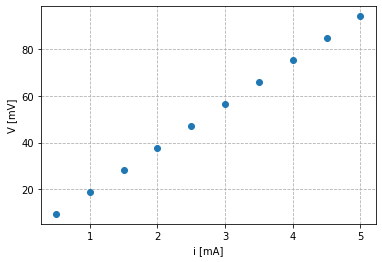

In [ ]:
# MODELO

plt.figure()
plt.plot(I0,V0,'o')
plt.xlabel('i [mA]')
plt.ylabel('V [mV]')
plt.grid(ls = '--')
plt.show()

Essa tensão de offset medida ocorre em virtude da assimetria microscópica do cristal. Ao criarmos uma diferença de potencial entre as diagonais do cristal, teremos uma distribuição de potencial na superfície e as extremidades não passarão pela mesma equipotencial e desse modo haverá uma diferença de potencial entre os pontos que aumentará conforme aumentar a tensão da fonte.

A tensão medida no experimento $V$ é a soma da tensão discutida na questão anterior $V_0$ e a tensão Hall $V_H$:

\begin{equation}
V_H(I) = V(I) - V_0(I)
\end{equation}

Verifique a linearidade entre $V_H$ e $I$ para diferentes valores de $B$.

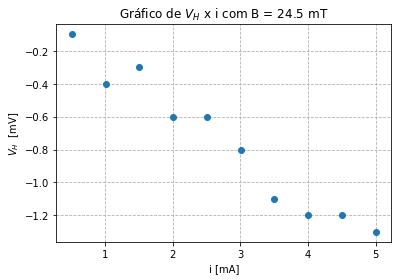

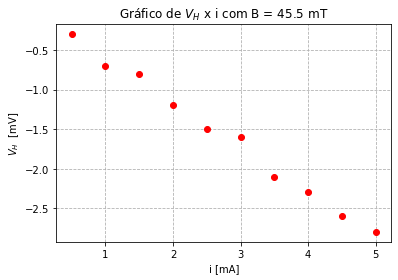

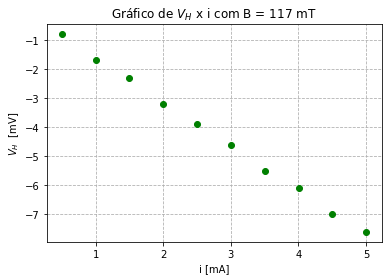

In [ ]:
# VERIFICAÇÃO

# cáculo de V_H :

def Vh(V,V0):
  Vh = []
  for i in range(len(V)):
    Vh.append(V[i] - V0[i])
  return Vh

#Para B1 = 24.5 mT

Vh_1 = Vh(V1,V0)
plt.figure()
plt.plot(I1,Vh_1,'o')
plt.xlabel('i [mA]')
plt.ylabel('$V_H$  [mV]')
plt.title('Gráfico de $V_H$ x i com B = 24.5 mT')
plt.grid(ls = '--')
plt.show()
print()

#Para B2 = 45.5 mT

Vh_2 = Vh(V2,V0)
plt.figure()
plt.plot(I2,Vh_2,'ro')
plt.xlabel('i [mA]')
plt.ylabel('$V_H$  [mV]')
plt.title('Gráfico de $V_H$ x i com B = 45.5 mT')
plt.grid(ls = '--')
plt.show()
print()
#Para B3 = 117 mT

Vh_3 = Vh(V3,V0)
plt.figure()
plt.plot(I3,Vh_3,'go')
plt.xlabel('i [mA]')
plt.ylabel('$V_H$  [mV]')
plt.title('Gráfico de $V_H$ x i com B = 117 mT')
plt.grid(ls = '--')
plt.show()

Utilizando regressão linear, determine o coeficiente Hall e a densidade de portadores da amostra utilizada no experimento.

O coeficiente angular $a$ será dado por :

\begin{align}
a &= \frac{R_H|\vec B|}{t} 
\end{align}

\begin{align}
R_H = \frac{at}{|\vec B|} 
\end{align}

onde t é a espessura do cristal.

Para o cálculo da densidade de portadores usaremos a seguinte relação :

\begin{align}
n = \frac{1}{R_H \ q} 
\end{align}

onde q é a carga elementar do elétron $q = 1,6 e(-19) C$

In [ ]:
# CÁLCULOS

def Rh(a,t,B):
  return (a*t)/B

def n(Rh):
  return Rh/(- 1.6e-19)

t = 0.3e-6     #[m]

# Para B = 24.5 mT 

a1,b1 = MMQ(I1,Vh_1)
Rh_1 = Rh(a1,t,24.5e-3)
n1 = n(Rh_1)
print('Para B = 24.5 mT , obtemos R_H = {}  e n = {} '.format(Rh_1,n1))

# Para B = 45.5 mT

a2,b2 = MMQ(I2,Vh_2)
Rh_2 = Rh(a2,t,45.5e-3)
n2 = n(Rh_2)
print('Para B = 45.5 mT , obtemos R_H = {}  e n = {} '.format(Rh_2,n2))

# Para B = 117 mT

a3,b3 = MMQ(I3,Vh_3)
Rh_3 = Rh(a3,t,117e-3)
n3 = n(Rh_3)
print('Para B = 117 mT , obtemos R_H = {}  e n = {} '.format(Rh_3,n3))

Para B = 24.5 mT , obtemos R_H = -3.3579185201231064e-06  e n = 20986990750769.418 
Para B = 45.5 mT , obtemos R_H = -3.6837248097377908e-06  e n = 23023280060861.195 
Para B = 117 mT , obtemos R_H = -3.88231107361692e-06  e n = 24264444210105.754 


Quais são os portadores majoritários no cristal do experimento? Explique sua resposta.

Os portadores majoritários do cristal do experimento são os elétrons, pois a tensão de Hall obsevada é negativa e ela tem o mesmo da carga dos portadores majoritários. Percebe-se que a tensão de Hall é negativa pois a tensão medida é menor para o mesmo valor de corrente quando o campo magnético aumenta, e a tensão do efeito Hall é dada por:

\begin{align}
V_H &= \frac{I|\vec B|}{n\cdot q\cdot t} \\
\end{align}

Nota-se a proporção com o módulo do campo magnético B e o sinal igual ao da carga q.

Discuta o efeito da iluminação sobre o cristal e os resultados observados.

Em nosso experimento observamos que a incidência de luz aumento em módulo a tensão Hall, diminuindo o valor medido de tensão entre as diagonais do cristal. A princípio era esperado o oposto, ou seja, que a tensão Hall diminuísse uma vez que a incidência de fótons provocaria a formação de pares elétron livre-lacuna aumenta a densidade de portadores no cristal.

---
*Roteiro original preparado pelos Profs. Furio Damiani e Peter JÃ¼rgen Tatsch*